In [1]:
## Import Packages

In [44]:
import pandas as pd
import datetime as dt
import seaborn as sns
import sqlite3

In [ ]:
# Part 1

In [3]:
## Import Files

In [4]:
df = pd.read_csv('Assignment_Log.csv')

In [5]:
## EDA

In [6]:
df.head()

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
0,06/22/2017 19:59:06,9fcbc63ff4c8bea5cea4efad782c87cf,5.00,5.00,Accepted Job,594bec5c95e2ce005840c23a,06/22/2017 12:12:12,review,1,review,0,13,14,4,6,2,0,1,1
1,06/22/2017 19:59:02,9fcbc63ff4c8bea5cea4efad782c87cf,5.00,5.00,Assigned Job,594bec5c95e2ce005840c23a,06/22/2017 12:12:12,review,1,review,1,13,15,5,6,2,0,1,1
2,06/22/2017 19:51:30,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Declined Job,594bec83fd2cf400280aa965,06/22/2017 12:12:51,writing,9,"sourcing, writing",1,12,12,5,5,1,0,0,1
3,06/22/2017 19:51:01,0e9802516f8a79dd0d45211dd4ee74af,4.50,4.50,Accepted Job,594c1f5cd7e68f0028c9062c,06/22/2017 15:49:48,sourcing,1,"sourcing, writing",1,11,12,5,5,1,0,0,1
4,06/22/2017 19:50:58,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Assigned Job,594bec83fd2cf400280aa965,06/22/2017 12:12:51,writing,8,"sourcing, writing",2,11,14,5,5,2,0,1,1


In [7]:
df.shape
#791 interactions between queue system and analysts

(791, 19)

In [8]:
df.dtypes
## It would be best to convert the columns that deal with dates/time to official date/time
## objects as there is very likely knowledge to be gained from looking at response times
## of analysts.

Event occurred at            object
Analyst                      object
Quality score (sourcing)    float64
Quality score (writing)     float64
Action                       object
Request                      object
Request created at           object
Job                          object
Wait time (min)               int64
Waiting for                  object
Analysts available            int64
Analysts occupied             int64
Total jobs available          int64
Review jobs available         int64
Vetting jobs available        int64
Planning jobs available       int64
Editing jobs available        int64
Sourcing jobs available       int64
Writing jobs available        int64
dtype: object

In [9]:
## Convert Datatypes

In [10]:
df['Event occurred at'] = pd.to_datetime(df['Event occurred at'], infer_datetime_format=True)

In [11]:
df['Request created at'] = pd.to_datetime(df['Request created at'], infer_datetime_format=True)

In [12]:
df.dtypes

Event occurred at           datetime64[ns]
Analyst                             object
Quality score (sourcing)           float64
Quality score (writing)            float64
Action                              object
Request                             object
Request created at          datetime64[ns]
Job                                 object
Wait time (min)                      int64
Waiting for                         object
Analysts available                   int64
Analysts occupied                    int64
Total jobs available                 int64
Review jobs available                int64
Vetting jobs available               int64
Planning jobs available              int64
Editing jobs available               int64
Sourcing jobs available              int64
Writing jobs available               int64
dtype: object

In [13]:
print(min(df['Request created at']))
print(max(df['Request created at']))

2017-06-19 13:43:51
2017-06-22 18:16:11


In [14]:
first_request = min(df['Request created at'])
last_request = max(df['Request created at'])
print('Requests in this data set span')
print(last_request - first_request)

Requests in this data set span
3 days 04:32:20


In [15]:
print(min(df['Event occurred at']))
print(max(df['Event occurred at']))

2017-06-21 20:15:42
2017-06-22 19:59:06


In [16]:
first_response = min(df['Event occurred at'])
last_response = max(df['Event occurred at'])
print('Responses in this data set span')
print(last_response - first_response)

Responses in this data set span
0 days 23:43:24


In [ ]:
## Nulls ?

In [17]:
df.isna().sum()

Event occurred at           0
Analyst                     0
Quality score (sourcing)    0
Quality score (writing)     0
Action                      0
Request                     0
Request created at          0
Job                         0
Wait time (min)             0
Waiting for                 6
Analysts available          0
Analysts occupied           0
Total jobs available        0
Review jobs available       0
Vetting jobs available      0
Planning jobs available     0
Editing jobs available      0
Sourcing jobs available     0
Writing jobs available      0
dtype: int64

In [18]:
## The only column to contain any nulls is the waiting for - could that mean
## that the job is completed? Is there any way to infer from the data that a job is
## considered complete?

In [19]:
### These nulls will have to be handled but the rest of the data may give some insight on
### how best to do that, so they will be left as is for now.

In [ ]:
## Scores - Writing v Sourcing
### There are no instances where the sourcing score and quality score differ.
### This could be a simple data area or an avenue of improvement as they are dilneated jobs
### they should be evaluated independently.

In [45]:
df.loc[~(df['Quality score (sourcing)'] == df['Quality score (writing)'])]

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available


In [20]:
## Requests

In [21]:
len(list(df.Request.unique()))

74

In [22]:
requests = list(df.Request.unique())

In [23]:
## Analysts

In [24]:
len(list(df.Analyst.unique()))

71

In [25]:
analysts = list(df.Analyst.unique())

In [25]:
df['Wait time (min)'].describe()

count    791.000000
mean       5.099874
std       12.153611
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      107.000000
Name: Wait time (min), dtype: float64

In [ ]:
## if declined

In [35]:
declined = df[df['Action'] == 'Declined Job']

In [36]:
declined.head()

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
2,2017-06-22 19:51:30,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Declined Job,594bec83fd2cf400280aa965,2017-06-22 12:12:51,writing,9,"sourcing, writing",1,12,12,5,5,1,0,0,1
6,2017-06-22 19:50:58,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Declined Job,594bec83fd2cf400280aa965,2017-06-22 12:12:51,writing,8,"sourcing, writing",2,11,14,5,5,2,0,1,1
28,2017-06-22 19:09:03,00360b3f177375b01b795a4be7b4686c,0.00,0.00,Declined Job,594c0b883b593b002812506e,2017-06-22 14:25:12,sourcing,107,sourcing,2,14,11,2,6,2,0,1,0
30,2017-06-22 19:08:28,00360b3f177375b01b795a4be7b4686c,0.00,0.00,Declined Job,594c0b883b593b002812506e,2017-06-22 14:25:12,sourcing,106,sourcing,2,14,11,2,6,2,0,1,0
42,2017-06-22 18:59:07,a09c8906073b4c0b75e3100b857b982a,5.00,5.00,Declined Job,594c0b883b593b002812506e,2017-06-22 14:25:12,planning,18,"planning, editing, sourcing, writing",4,12,12,3,7,1,0,1,0


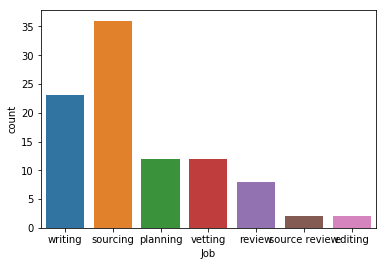

In [37]:
sns.countplot(declined['Job'])

In [ ]:
## Sourcing Jobs have the highest occurence of job declining. Is there something that can be improved about
## how they are presented. Can they be incentivized? Are other jobs too highly incentivized?

In [38]:
declined['Wait time (min)'].describe()

count     95.000000
mean      12.294737
std       20.636610
min        1.000000
25%        2.000000
50%        3.000000
75%       14.500000
max      107.000000
Name: Wait time (min), dtype: float64

In [ ]:
### How does this compare to the wait time on accepted jobs?

In [ ]:
## Accepted

In [39]:
accepted = df[df['Action'] == 'Accepted Job']

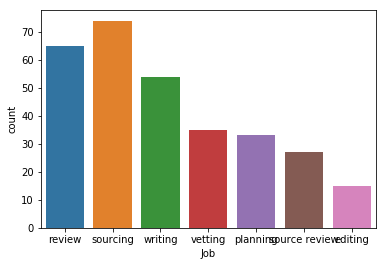

In [40]:
sns.countplot(accepted['Job'])

In [41]:
df.Job.value_counts()

sourcing         211
writing          160
review           143
vetting           94
planning          94
source review     58
editing           31
Name: Job, dtype: int64

In [47]:
df[df['Action'] != 'Accepted Job'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-19 13:43:51 718 2017-06-21 21:26:17  d8e25a290ea51352bf9100a99c475f6d   
                    714 2017-06-21 21:26:52  d8e25a290ea51352bf9100a99c475f6d   
                    715 2017-06-21 21:26:52  d8e25a290ea51352bf9100a99c475f6d   
                    698 2017-06-21 21:50:30  a09c8906073b4c0b75e3100b857b982a   
2017-06-19 19:20:06 720 2017-06-21 21:26:17  b599bfb42906772db81ac90137fc1916   
                    532 2017-06-22 01:39:30  a09c8906073b4c0b75e3100b857b982a   
                    451 2017-06-22 04:50:59  7e22ad15724c44543d1d4bcafd10c812   
                    438 2017-06-22 05:04:00  e817dd4305458b293cbeb3015da99565   
                    389 2017-06-22 06:19:33  642782c690c8d963c487300a4751e220   
2017-06-19 20:38:18 739 2017-06-21 21:18:06  9fcbc63ff4c8bea5cea4efad782c87cf   
2017-06-20 11:58:37 730 2017-06-21 21:21:01  39012c98c8fb80752d2bbcc3dc285230   
                    722 2017-06-21 21:25:06  9fcbc63ff4c8bea5cea4efad782c87cf   
                    688 2017-06-21 22:03:02  9fa24ddce8fd9d1526d9d7451304fc74   
2017-06-20 12:23:47 690 2017-06-21 22:00:07  a09c8906073b4c0b75e3100b857b982a   
2017-06-20 18:56:28 786 2017-06-21 20:21:32  39012c98c8fb80752d2bbcc3dc285230   
                    749 2017-06-21 21:11:41  39012c98c8fb80752d2bbcc3dc285230   
                    731 2017-06-21 21:21:01  d74c4a7423dd3ee0a78de5481c364823   
                    706 2017-06-21 21:33:52  8258591d197a3936de0f7ee021ab9e0e   
                    630 2017-06-21 23:01:59  b692db6843c42f5ce686fcdfda4e0b62   
                    558 2017-06-22 00:58:58  a09c8906073b4c0b75e3100b857b982a   
                    511 2017-06-22 02:05:22  c9401f82fdedf3cd080a03bafe3447c7   
                    419 2017-06-22 05:37:07  795930bc4ed320777ad76b46da2ed66d   
                    404 2017-06-22 05:46:09  642782c690c8d963c487300a4751e220   
                    400 2017-06-22 05:53:43  642782c690c8d963c487300a4751e220   
                    398 2017-06-22 06:01:39  632a6492e9ff20cc4a442245836424e5   
                    268 2017-06-22 11:10:42  7e22ad15724c44543d1d4bcafd10c812   
                    262 2017-06-22 12:18:31  732e4a29b2e318bce3c1e923276ddf51   
                    260 2017-06-22 12:38:26  9fa24ddce8fd9d1526d9d7451304fc74   
                    258 2017-06-22 12:46:02  710dbda77cade1eced9c735c08e6e38d   
                    244 2017-06-22 13:16:17  de71db592b02c988670ca3d301a02568   
...                                     ...                               ...   
2017-06-22 15:05:54 128 2017-06-22 15:33:11  62060850630c7afe54fd59151413d237   
                    127 2017-06-22 15:34:21  62060850630c7afe54fd59151413d237   
                    35  2017-06-22 19:06:08  6b19235b9269df81b6da879771bf40bc   
                    18  2017-06-22 19:31:15  c033808b89b50e6f550caf266470f090   
2017-06-22 15:08:21 149 2017-06-22 15:15:03  62060850630c7afe54fd59151413d237   
                    147 2017-06-22 15:15:38  62060850630c7afe54fd59151413d237   
                    148 2017-06-22 15:15:38  62060850630c7afe54fd59151413d237   
                    125 2017-06-22 15:37:16  62060850630c7afe54fd59151413d237   
                    113 2017-06-22 15:56:33  00360b3f177375b01b795a4be7b4686c   
                    109 2017-06-22 15:57:08  00360b3f177375b01b795a4be7b4686c   
                    110 2017-06-22 15:57:08  00360b3f177375b01b795a4be7b4686c   
                    108 2017-06-22 15:57:43  00360b3f177375b01b795a4be7b4686c   
                    107 2017-06-22 16:01:36  b89eb67419465a9e2c9da08dae6023e2   
                    101 2017-06-22 16:09:47  62060850630c7afe54fd59151413d237   
                    99  2017-06-22 16:17:17  9286ce84f2401fbd6635f7d768c3cad1   
                    51  2017-06-22 18:36:56  a09c8906073b4c0b75e3100b857b982a   
2017-06-22 15:30:04 133 2017-06-22 15:30:15  95130c93e28b

In [ ]:
## Handling 'Wait for' nulls

In [51]:
df2 = df[df['Waiting for'].isna()]

In [52]:
df2.head(2)

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
195,2017-06-22 14:30:59,9fa24ddce8fd9d1526d9d7451304fc74,4.89,4.89,Accepted Job,594bec7ffd2cf400280aa953,2017-06-22 12:12:47,sourcing,26,NaN,5,15,8,0,3,5,0,0,0
340,2017-06-22 08:01:25,a29fe6d26c1a49ff4a3c876eaee0a1af,0.00,0.00,Accepted Job,594a9ce6c864e200288e766b,2017-06-21 12:20:54,sourcing,1,NaN,3,10,3,0,0,1,0,0,2


In [45]:
df2.Request.is_unique
## All of the requests that are not 'waiting'.

True

In [53]:
waiting_for_na = list(df2.Request)

In [54]:
waiting_for_na

['594bec7ffd2cf400280aa953',
 '594a9ce6c864e200288e766b',
 '594a8fd422b3c50028e71976',
 '594af3c6f3b9f600287eabe0',
 '594b20ee3f82d10028f03c74',
 '594ae6fb4f06e20035d92345']

In [ ]:
## - Null 1

In [64]:
df[df['Request'] == '594bec7ffd2cf400280aa953'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-22 12:12:47 215 2017-06-22 13:32:40  94959cf2d0b592d0fa1e5e9cf760a1c7   
                    214 2017-06-22 13:32:46  94959cf2d0b592d0fa1e5e9cf760a1c7   
                    197 2017-06-22 14:30:33  9fa24ddce8fd9d1526d9d7451304fc74   
                    196 2017-06-22 14:30:54  9fa24ddce8fd9d1526d9d7451304fc74   
                    195 2017-06-22 14:30:59  9fa24ddce8fd9d1526d9d7451304fc74   
                    190 2017-06-22 14:33:29  d5aa695af013ee5baaeeccfb7ca50c80   
                    189 2017-06-22 14:33:35  d5aa695af013ee5baaeeccfb7ca50c80   
                    188 2017-06-22 14:33:36  d5aa695af013ee5baaeeccfb7ca50c80   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-22 12:12:47 215                      5.00                     5.00   
                    214                      5.00                     5.00   
                    197                      4.89                     4.89   
                    196                      4.89                     4.89   
                    195                      4.89                     4.89   
                    190                      4.70                     4.70   
                    189                      4.70                     4.70   
                    188                      4.70                     4.70   

                               Action                   Request  \
Request created at                                                
2017-06-22 12:12:47 215  Assigned Job  594bec7ffd2cf400280aa953   
                    214  Accepted Job  594bec7ffd2cf400280aa953   
                    197  Assigned Job  594bec7ffd2cf400280aa953   
                    196  Accepted Job  594bec7ffd2cf400280aa953   
                    195  Accepted Job  594bec7ffd2cf400280aa953   
                    190  Assigned Job  594bec7ffd2cf400280aa953   
                    189  Accepted Job  594bec7ffd2cf400280aa953   
                    188  Accepted Job  594bec7ffd2cf400280aa953   

                         Request created at       Job  Wait time (min)  \
Request created at                                                       
2017-06-22 12:12:47 215 2017-06-22 12:12:47  planning                1   
                    214 2017-06-22 12:12:47  planning                1   
                    197 2017-06-22 12:12:47  sourcing               26   
                    196 2017-06-22 12:12:47  sourcing               26   
                    195 2017-06-22 12:12:47  sourcing               26   
                    190 2017-06-22 12:12:47  sourcing                1   
                    189 2017-06-22 12:12:47  sourcing                1   
                    188 2017-06-22 12:12:47  sourcing                1   

                                        Waiting for  Analysts available  \
Request created at                                                        
2017-06-22 12:12:47 215                    planning                   5   
                    214                    planning                   4   
                    197                    sourcing                   5   
                    196                    sourcing                   5   
                    195                         NaN                   5   
                    190  editing, sourcing, writing                   6   
                    189  editing, sourcing, writing                   5   
                    188  editing, sourcing, writing                   5   

                         Analysts occupied  Total jobs available  \
Request created at                                                 
2017-06-22 12:12:47 215                 12                    10   
                    214                 12                     9   

In [ ]:
## - Null 2

In [55]:
df[df['Request'] == '594a9ce6c864e200288e766b'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-21 12:20:54 545 2017-06-22 01:22:10  a09c8906073b4c0b75e3100b857b982a   
                    544 2017-06-22 01:22:14  a09c8906073b4c0b75e3100b857b982a   
                    529 2017-06-22 01:40:05  77b8ab28b9e95edb3a69ca7a6d352ec8   
                    528 2017-06-22 01:40:09  77b8ab28b9e95edb3a69ca7a6d352ec8   
                    525 2017-06-22 01:50:20  caf77e4ba6154e998b352cc92c685f80   
                    524 2017-06-22 01:50:22  caf77e4ba6154e998b352cc92c685f80   
                    515 2017-06-22 02:03:40  5233d783ae5bf0483cf49549cbc594f8   
                    514 2017-06-22 02:03:43  5233d783ae5bf0483cf49549cbc594f8   
                    396 2017-06-22 06:03:24  642782c690c8d963c487300a4751e220   
                    395 2017-06-22 06:03:29  642782c690c8d963c487300a4751e220   
                    387 2017-06-22 06:20:08  2df8ce7d317c7d89dfa95be7695d2de0   
                    386 2017-06-22 06:20:10  2df8ce7d317c7d89dfa95be7695d2de0   
                    347 2017-06-22 07:59:53  1f8d8b08a994331e419d24293ce9e7b0   
                    346 2017-06-22 08:00:28  1f8d8b08a994331e419d24293ce9e7b0   
                    345 2017-06-22 08:00:28  1f8d8b08a994331e419d24293ce9e7b0   
                    344 2017-06-22 08:01:03  1f8d8b08a994331e419d24293ce9e7b0   
                    343 2017-06-22 08:01:03  a29fe6d26c1a49ff4a3c876eaee0a1af   
                    342 2017-06-22 08:01:20  a29fe6d26c1a49ff4a3c876eaee0a1af   
                    341 2017-06-22 08:01:22  a29fe6d26c1a49ff4a3c876eaee0a1af   
                    340 2017-06-22 08:01:25  a29fe6d26c1a49ff4a3c876eaee0a1af   
                    339 2017-06-22 08:03:23  98de7e62209a07eee6ec8dc984911042   
                    338 2017-06-22 08:03:26  98de7e62209a07eee6ec8dc984911042   
                    314 2017-06-22 09:23:21  795930bc4ed320777ad76b46da2ed66d   
                    313 2017-06-22 09:23:56  795930bc4ed320777ad76b46da2ed66d   
                    312 2017-06-22 09:23:56  795930bc4ed320777ad76b46da2ed66d   
                    311 2017-06-22 09:24:32  795930bc4ed320777ad76b46da2ed66d   
                    310 2017-06-22 09:25:42  7e22ad15724c44543d1d4bcafd10c812   
                    309 2017-06-22 09:25:49  7e22ad15724c44543d1d4bcafd10c812   
                    308 2017-06-22 09:50:13  57ef46a92ecee8e187f4d450e92651ea   
                    307 2017-06-22 09:50:15  57ef46a92ecee8e187f4d450e92651ea   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-21 12:20:54 545                      5.00                     5.00   
                    544                      5.00                     5.00   
                    529                      0.00                     0.00   
                    528                      0.00                     0.00   
                    525                      4.83                     4.83   
                    524                      4.83                     4.83   
                    515                      0.00                     0.00   
                    514                      0.00                     0.00   
                    396                      4.97                     4.97   
                    395                      4.97                     4.97   
                    387                      0.00                     0.00   
                    386                      0.00                     0.00   
                    347                      0.00                     0.00   
                    346                      0.00                     0.00   
                    345                      0.00                     0.00   
                    344                      0.00                     0.00   
                    343      

In [ ]:
## - Null 3

In [56]:
df[df['Request'] == '594a8fd422b3c50028e71976'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-21 11:25:08 678 2017-06-21 22:06:59  732e4a29b2e318bce3c1e923276ddf51   
                    677 2017-06-21 22:07:01  732e4a29b2e318bce3c1e923276ddf51   
                    657 2017-06-21 22:35:23  482e9b14d8d59b748320f89074362746   
                    655 2017-06-21 22:35:25  482e9b14d8d59b748320f89074362746   
                    651 2017-06-21 22:36:33  0c2680433387fb4cf51a3546296f8422   
                    648 2017-06-21 22:36:43  0c2680433387fb4cf51a3546296f8422   
                    417 2017-06-22 05:39:18  c9401f82fdedf3cd080a03bafe3447c7   
                    416 2017-06-22 05:39:53  c9401f82fdedf3cd080a03bafe3447c7   
                    415 2017-06-22 05:39:53  c9401f82fdedf3cd080a03bafe3447c7   
                    408 2017-06-22 05:42:07  642782c690c8d963c487300a4751e220   
                    407 2017-06-22 05:42:42  642782c690c8d963c487300a4751e220   
                    406 2017-06-22 05:42:42  642782c690c8d963c487300a4751e220   
                    405 2017-06-22 05:43:14  642782c690c8d963c487300a4751e220   
                    394 2017-06-22 06:05:44  caf77e4ba6154e998b352cc92c685f80   
                    393 2017-06-22 06:13:34  766d3435eda76c4de9f034b8f97a0602   
                    392 2017-06-22 06:13:40  766d3435eda76c4de9f034b8f97a0602   
                    373 2017-06-22 07:23:41  2d0f64a208f69a70ec415cfccb59cc24   
                    371 2017-06-22 07:23:45  2d0f64a208f69a70ec415cfccb59cc24   
                    319 2017-06-22 09:01:10  7e22ad15724c44543d1d4bcafd10c812   
                    318 2017-06-22 09:01:12  7e22ad15724c44543d1d4bcafd10c812   
                    317 2017-06-22 09:05:15  795930bc4ed320777ad76b46da2ed66d   
                    316 2017-06-22 09:05:23  795930bc4ed320777ad76b46da2ed66d   
                    315 2017-06-22 09:05:24  795930bc4ed320777ad76b46da2ed66d   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-21 11:25:08 678                      5.00                     5.00   
                    677                      5.00                     5.00   
                    657                      4.55                     4.55   
                    655                      4.55                     4.55   
                    651                      4.48                     4.48   
                    648                      4.48                     4.48   
                    417                      0.00                     0.00   
                    416                      0.00                     0.00   
                    415                      0.00                     0.00   
                    408                      4.97                     4.97   
                    407                      4.97                     4.97   
                    406                      4.97                     4.97   
                    405                      4.97                     4.97   
                    394                      4.83                     4.83   
                    393                      3.50                     3.50   
                    392                      3.50                     3.50   
                    373                      3.85                     3.85   
                    371                      3.85                     3.85   
                    319                      5.00                     5.00   
                    318                      5.00                     5.00   
                    317                      4.80                     4.80   
                    316                      4.80                     4.80   
                    315                      4.80                     4.80   

                               Action            

In [ ]:
## - Null 4

In [57]:
df[df['Request'] == '594af3c6f3b9f600287eabe0'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-21 18:31:34 674 2017-06-21 22:10:29  a09c8906073b4c0b75e3100b857b982a   
                    673 2017-06-21 22:10:32  a09c8906073b4c0b75e3100b857b982a   
                    647 2017-06-21 22:37:08  482e9b14d8d59b748320f89074362746   
                    646 2017-06-21 22:37:11  482e9b14d8d59b748320f89074362746   
                    455 2017-06-22 04:40:03  7e22ad15724c44543d1d4bcafd10c812   
                    454 2017-06-22 04:40:07  7e22ad15724c44543d1d4bcafd10c812   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-21 18:31:34 674                      5.00                     5.00   
                    673                      5.00                     5.00   
                    647                      4.55                     4.55   
                    646                      4.55                     4.55   
                    455                      5.00                     5.00   
                    454                      5.00                     5.00   

                               Action                   Request  \
Request created at                                                
2017-06-21 18:31:34 674  Assigned Job  594af3c6f3b9f600287eabe0   
                    673  Accepted Job  594af3c6f3b9f600287eabe0   
                    647  Assigned Job  594af3c6f3b9f600287eabe0   
                    646  Accepted Job  594af3c6f3b9f600287eabe0   
                    455  Assigned Job  594af3c6f3b9f600287eabe0   
                    454  Accepted Job  594af3c6f3b9f600287eabe0   

                         Request created at            Job  Wait time (min)  \
Request created at                                                            
2017-06-21 18:31:34 674 2017-06-21 18:31:34  source review                1   
                    673 2017-06-21 18:31:34  source review                1   
                    647 2017-06-21 18:31:34        writing                1   
                    646 2017-06-21 18:31:34        writing                1   
                    455 2017-06-21 18:31:34         review                1   
                    454 2017-06-21 18:31:34         review                1   

                                                          Waiting for  \
Request created at                                                      
2017-06-21 18:31:34 674  review, planning, editing, sourcing, writing   
                    673  review, planning, editing, sourcing, writing   
                    647                             sourcing, writing   
                    646                             sourcing, writing   
                    455                                        review   
                    454                                           NaN   

                         Analysts available  Analysts occupied  \
Request created at                                               
2017-06-21 18:31:34 674                   3                 21   
                    673                   2                 21   
                    647                   1                 21   
                    646                   0                 21   
                    455                   1                 15   
                    454                   0                 15   

                         Total jobs available  Review jobs available  \
Request created at                                                     
2017-06-21 18:31:34 674                    10                      1   
                    673                     9                      0   
                    647                     9                      0   
                    646                     8                      0   
                    455             

In [ ]:
## - Null 5

In [58]:
df[df['Request'] == '594b20ee3f82d10028f03c74'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-21 21:44:14 619 2017-06-21 23:07:14  a09c8906073b4c0b75e3100b857b982a   
                    615 2017-06-21 23:07:49  a09c8906073b4c0b75e3100b857b982a   
                    616 2017-06-21 23:07:49  a09c8906073b4c0b75e3100b857b982a   
                    612 2017-06-21 23:08:24  a09c8906073b4c0b75e3100b857b982a   
                    599 2017-06-21 23:22:30  f7f7591403c6c431053920223069550a   
                    595 2017-06-21 23:23:02  f7f7591403c6c431053920223069550a   
                    588 2017-06-21 23:34:58  85c7b78e76b5232cd38014ea4cdc8f56   
                    587 2017-06-21 23:35:09  85c7b78e76b5232cd38014ea4cdc8f56   
                    569 2017-06-22 00:15:11  d6eaa4eeb52b4d62ec78299454763870   
                    568 2017-06-22 00:15:14  d6eaa4eeb52b4d62ec78299454763870   
                    459 2017-06-22 04:34:05  7e22ad15724c44543d1d4bcafd10c812   
                    458 2017-06-22 04:34:15  7e22ad15724c44543d1d4bcafd10c812   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-21 21:44:14 619                       5.0                      5.0   
                    615                       5.0                      5.0   
                    616                       5.0                      5.0   
                    612                       5.0                      5.0   
                    599                       5.0                      5.0   
                    595                       5.0                      5.0   
                    588                       4.5                      4.5   
                    587                       4.5                      4.5   
                    569                       5.0                      5.0   
                    568                       5.0                      5.0   
                    459                       5.0                      5.0   
                    458                       5.0                      5.0   

                               Action                   Request  \
Request created at                                                
2017-06-21 21:44:14 619  Assigned Job  594b20ee3f82d10028f03c74   
                    615  Assigned Job  594b20ee3f82d10028f03c74   
                    616  Declined Job  594b20ee3f82d10028f03c74   
                    612  Declined Job  594b20ee3f82d10028f03c74   
                    599  Assigned Job  594b20ee3f82d10028f03c74   
                    595  Accepted Job  594b20ee3f82d10028f03c74   
                    588  Assigned Job  594b20ee3f82d10028f03c74   
                    587  Accepted Job  594b20ee3f82d10028f03c74   
                    569  Assigned Job  594b20ee3f82d10028f03c74   
                    568  Accepted Job  594b20ee3f82d10028f03c74   
                    459  Assigned Job  594b20ee3f82d10028f03c74   
                    458  Accepted Job  594b20ee3f82d10028f03c74   

                         Request created at       Job  Wait time (min)  \
Request created at                                                       
2017-06-21 21:44:14 619 2017-06-21 21:44:14  planning                1   
                    615 2017-06-21 21:44:14  planning                1   
                    616 2017-06-21 21:44:14  planning                1   
                    612 2017-06-21 21:44:14  planning                2   
                    599 2017-06-21 21:44:14  planning                1   
                    595 2017-06-21 21:44:14  planning                1   
                    588 2017-06-21 21:44:14  sourcing                1   
                    587 2017-06-21 21:44:14  sourcing                1   
                    569 2017-06-21 21:44:14  sourcing                1   
                    568 2017-06-21 21:44:14  

In [ ]:
## - Null 6

In [59]:
df[df['Request'] == '594ae6fb4f06e20035d92345'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-21 17:36:59 742 2017-06-21 21:14:01  9fcbc63ff4c8bea5cea4efad782c87cf   
                    741 2017-06-21 21:14:03  9fcbc63ff4c8bea5cea4efad782c87cf   
                    725 2017-06-21 21:24:31  206de922289a1f9f5ee250fc71308628   
                    724 2017-06-21 21:24:38  206de922289a1f9f5ee250fc71308628   
                    723 2017-06-21 21:24:44  206de922289a1f9f5ee250fc71308628   
                    601 2017-06-21 23:19:14  5078cc506436a8668c0b6de594842fcf   
                    586 2017-06-21 23:37:09  c2dcc0b178176d7e6b185df9bd1cb4f2   
                    572 2017-06-22 00:13:25  d6eaa4eeb52b4d62ec78299454763870   
                    571 2017-06-22 00:14:00  d6eaa4eeb52b4d62ec78299454763870   
                    570 2017-06-22 00:14:00  d6eaa4eeb52b4d62ec78299454763870   
                    556 2017-06-22 01:01:53  caf77e4ba6154e998b352cc92c685f80   
                    555 2017-06-22 01:01:56  caf77e4ba6154e998b352cc92c685f80   
                    483 2017-06-22 03:49:58  632a6492e9ff20cc4a442245836424e5   
                    482 2017-06-22 03:50:33  632a6492e9ff20cc4a442245836424e5   
                    481 2017-06-22 03:50:33  632a6492e9ff20cc4a442245836424e5   
                    480 2017-06-22 03:50:39  632a6492e9ff20cc4a442245836424e5   
                    391 2017-06-22 06:17:54  7e22ad15724c44543d1d4bcafd10c812   
                    390 2017-06-22 06:18:00  7e22ad15724c44543d1d4bcafd10c812   
                    381 2017-06-22 06:47:33  9fcbc63ff4c8bea5cea4efad782c87cf   
                    380 2017-06-22 06:47:37  9fcbc63ff4c8bea5cea4efad782c87cf   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-21 17:36:59 742                      5.00                     5.00   
                    741                      5.00                     5.00   
                    725                      3.17                     3.17   
                    724                      3.17                     3.17   
                    723                      3.17                     3.17   
                    601                      4.20                     4.20   
                    586                      0.00                     0.00   
                    572                      5.00                     5.00   
                    571                      5.00                     5.00   
                    570                      5.00                     5.00   
                    556                      4.83                     4.83   
                    555                      4.83                     4.83   
                    483                      4.17                     4.17   
                    482                      4.17                     4.17   
                    481                      4.17                     4.17   
                    480                      4.17                     4.17   
                    391                      5.00                     5.00   
                    390                      5.00                     5.00   
                    381                      5.00                     5.00   
                    380                      5.00                     5.00   

                               Action                   Request  \
Request created at                                                
2017-06-21 17:36:59 742  Assigned Job  594ae6fb4f06e20035d92345   
                    741  Accepted Job  594ae6fb4f06e20035d92345   
                    725  Assigned Job  594ae6fb4f06e20035d92345   
                    724  Accepted Job  594ae6fb4f06e20035d92345   
                    723  Accepted Job  594ae6fb4f06e20035d92345   
                    601  Assigned Job  594ae6fb4f06e20035

In [62]:
df.head()

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
0,2017-06-22 19:59:06,9fcbc63ff4c8bea5cea4efad782c87cf,5.00,5.00,Accepted Job,594bec5c95e2ce005840c23a,2017-06-22 12:12:12,review,1,review,0,13,14,4,6,2,0,1,1
1,2017-06-22 19:59:02,9fcbc63ff4c8bea5cea4efad782c87cf,5.00,5.00,Assigned Job,594bec5c95e2ce005840c23a,2017-06-22 12:12:12,review,1,review,1,13,15,5,6,2,0,1,1
2,2017-06-22 19:51:30,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Declined Job,594bec83fd2cf400280aa965,2017-06-22 12:12:51,writing,9,"sourcing, writing",1,12,12,5,5,1,0,0,1
3,2017-06-22 19:51:01,0e9802516f8a79dd0d45211dd4ee74af,4.50,4.50,Accepted Job,594c1f5cd7e68f0028c9062c,2017-06-22 15:49:48,sourcing,1,"sourcing, writing",1,11,12,5,5,1,0,0,1
4,2017-06-22 19:50:58,85c7b78e76b5232cd38014ea4cdc8f56,4.35,4.35,Assigned Job,594bec83fd2cf400280aa965,2017-06-22 12:12:51,writing,8,"sourcing, writing",2,11,14,5,5,2,0,1,1


In [60]:
df['Waiting for'].fillna(df.Job, inplace = True)

In [62]:
df[df['Request'] == '594bec7ffd2cf400280aa953'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-22 12:12:47 215 2017-06-22 13:32:40  94959cf2d0b592d0fa1e5e9cf760a1c7   
                    214 2017-06-22 13:32:46  94959cf2d0b592d0fa1e5e9cf760a1c7   
                    197 2017-06-22 14:30:33  9fa24ddce8fd9d1526d9d7451304fc74   
                    196 2017-06-22 14:30:54  9fa24ddce8fd9d1526d9d7451304fc74   
                    195 2017-06-22 14:30:59  9fa24ddce8fd9d1526d9d7451304fc74   
                    190 2017-06-22 14:33:29  d5aa695af013ee5baaeeccfb7ca50c80   
                    189 2017-06-22 14:33:35  d5aa695af013ee5baaeeccfb7ca50c80   
                    188 2017-06-22 14:33:36  d5aa695af013ee5baaeeccfb7ca50c80   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-22 12:12:47 215                      5.00                     5.00   
                    214                      5.00                     5.00   
                    197                      4.89                     4.89   
                    196                      4.89                     4.89   
                    195                      4.89                     4.89   
                    190                      4.70                     4.70   
                    189                      4.70                     4.70   
                    188                      4.70                     4.70   

                               Action                   Request  \
Request created at                                                
2017-06-22 12:12:47 215  Assigned Job  594bec7ffd2cf400280aa953   
                    214  Accepted Job  594bec7ffd2cf400280aa953   
                    197  Assigned Job  594bec7ffd2cf400280aa953   
                    196  Accepted Job  594bec7ffd2cf400280aa953   
                    195  Accepted Job  594bec7ffd2cf400280aa953   
                    190  Assigned Job  594bec7ffd2cf400280aa953   
                    189  Accepted Job  594bec7ffd2cf400280aa953   
                    188  Accepted Job  594bec7ffd2cf400280aa953   

                         Request created at       Job  Wait time (min)  \
Request created at                                                       
2017-06-22 12:12:47 215 2017-06-22 12:12:47  planning                1   
                    214 2017-06-22 12:12:47  planning                1   
                    197 2017-06-22 12:12:47  sourcing               26   
                    196 2017-06-22 12:12:47  sourcing               26   
                    195 2017-06-22 12:12:47  sourcing               26   
                    190 2017-06-22 12:12:47  sourcing                1   
                    189 2017-06-22 12:12:47  sourcing                1   
                    188 2017-06-22 12:12:47  sourcing                1   

                                        Waiting for  Analysts available  \
Request created at                                                        
2017-06-22 12:12:47 215                    planning                   5   
                    214                    planning                   4   
                    197                    sourcing                   5   
                    196                    sourcing                   5   
                    195                    sourcing                   5   
                    190  editing, sourcing, writing                   6   
                    189  editing, sourcing, writing                   5   
                    188  editing, sourcing, writing                   5   

                         Analysts occupied  Total jobs available  \
Request created at                                                 
2017-06-22 12:12:47 215                 12                    10   
                    214                 12                     9   

In [ ]:
### After reviewing each of the six that were missing values it appeared that 
### there was no discernable way that would indicate that the job had been completed and appeared most
### similarly to the ones that were missing seemed to indicate that it would be the same as the current
### job listed so that was what I decided to fill in with.

In [ ]:
## Analyst Availability

In [64]:
declined['Analysts occupied'].describe()

count    95.000000
mean     16.431579
std       5.037419
min       7.000000
25%      13.000000
50%      17.000000
75%      20.000000
max      25.000000
Name: Analysts occupied, dtype: float64

In [65]:
declined['Analysts available'].describe()

count    95.000000
mean      3.494737
std       1.934423
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       8.000000
Name: Analysts available, dtype: float64

In [66]:
accepted['Analysts occupied'].describe()

count    303.000000
mean      14.825083
std        4.792975
min        7.000000
25%       10.500000
50%       14.000000
75%       19.000000
max       24.000000
Name: Analysts occupied, dtype: float64

In [67]:
accepted['Analysts available'].describe()

count    303.000000
mean       1.887789
std        1.713005
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        7.000000
Name: Analysts available, dtype: float64

In [ ]:
### Can analysts have more than one assignment? Is available mean that they are currently not
### assigned to a role or does it mean that are logged on to the platform?

In [ ]:
## Problem Child Request
### This request had the most interaction on the platform in the data set
### what was it about this particular request that was a problem?

In [71]:
df.Request.value_counts()

594ab554c864e200288e76ef    43
5949a81c4d1319005556396c    32
594b20eb3f82d10028f03c5c    31
594a9ce6c864e200288e766b    30
594c0b883b593b002812506e    29
594b20ef3f82d10028f03c7c    27
594b20ea3f82d10028f03c54    24
594bec83fd2cf400280aa965    24
594b31f09d87570035cccafd    24
594a8fd422b3c50028e71976    23
594b06c06cdeef002881af83    20
594ae6fb4f06e20035d92345    20
594aead5ef88150028311172    20
594b0303f3b9f600287eac2b    20
594af29d3f82d10028f03bb2    19
594b1abfa6992500289d6040    18
594c15a573dd9c002873cda1    18
594c151273dd9c002873cd98    18
594b945bf8b866004036d9c3    18
594bec81fd2cf400280aa95c    14
594bcdd680f13f00405cd4e8    14
594bebaa632eb100405ab4c3    14
594bec5b95e2ce005840c232    13
594a5e5566cb69006fdcf09d    13
594bec5a95e2ce005840c22a    13
594b20ee3f82d10028f03c74    12
594b20ed3f82d10028f03c6c    12
594bec5c95e2ce005840c242    10
594bec5e95e2ce005840c252    10
594a8f5664251c002831f4c5    10
                            ..
594ae6944f06e20035d92325     6
594b06bf

In [68]:
pc = df.loc[df.Request == '594ab554c864e200288e76ef']

In [72]:
df[df['Request'] == '594ab554c864e200288e76ef'].groupby("Request created at").apply(lambda x: x.sort_values(["Event occurred at"]))

Event occurred at                           Analyst  \
Request created at                                                              
2017-06-21 14:05:08 770 2017-06-21 20:52:31  9fcbc63ff4c8bea5cea4efad782c87cf   
                    769 2017-06-21 20:52:37  9fcbc63ff4c8bea5cea4efad782c87cf   
                    766 2017-06-21 21:00:41  c9401f82fdedf3cd080a03bafe3447c7   
                    763 2017-06-21 21:01:16  c9401f82fdedf3cd080a03bafe3447c7   
                    762 2017-06-21 21:01:16  c9401f82fdedf3cd080a03bafe3447c7   
                    761 2017-06-21 21:01:48  c9401f82fdedf3cd080a03bafe3447c7   
                    759 2017-06-21 21:07:01  0e9802516f8a79dd0d45211dd4ee74af   
                    757 2017-06-21 21:07:02  0e9802516f8a79dd0d45211dd4ee74af   
                    754 2017-06-21 21:08:11  c9401f82fdedf3cd080a03bafe3447c7   
                    753 2017-06-21 21:08:46  c9401f82fdedf3cd080a03bafe3447c7   
                    752 2017-06-21 21:08:46  c9401f82fdedf3cd080a03bafe3447c7   
                    751 2017-06-21 21:09:21  c9401f82fdedf3cd080a03bafe3447c7   
                    750 2017-06-21 21:11:41  c9401f82fdedf3cd080a03bafe3447c7   
                    747 2017-06-21 21:12:16  c9401f82fdedf3cd080a03bafe3447c7   
                    746 2017-06-21 21:12:16  c9401f82fdedf3cd080a03bafe3447c7   
                    745 2017-06-21 21:12:51  c9401f82fdedf3cd080a03bafe3447c7   
                    727 2017-06-21 21:21:36  0c2680433387fb4cf51a3546296f8422   
                    726 2017-06-21 21:21:39  0c2680433387fb4cf51a3546296f8422   
                    712 2017-06-21 21:32:42  dddcdea13df8232803957a5d9c847aae   
                    711 2017-06-21 21:33:17  dddcdea13df8232803957a5d9c847aae   
                    709 2017-06-21 21:33:17  482e9b14d8d59b748320f89074362746   
                    708 2017-06-21 21:33:20  482e9b14d8d59b748320f89074362746   
                    626 2017-06-21 23:04:19  d9837e646a15a4fdd823531178b2d62e   
                    624 2017-06-21 23:04:54  d9837e646a15a4fdd823531178b2d62e   
                    623 2017-06-21 23:04:54  d9837e646a15a4fdd823531178b2d62e   
                    622 2017-06-21 23:05:29  d9837e646a15a4fdd823531178b2d62e   
                    621 2017-06-21 23:06:39  d9837e646a15a4fdd823531178b2d62e   
                    620 2017-06-21 23:06:55  d9837e646a15a4fdd823531178b2d62e   
                    608 2017-06-21 23:11:54  ea5354c723ba83f2c412c238b133e84a   
                    606 2017-06-21 23:12:02  ea5354c723ba83f2c412c238b133e84a   
                    541 2017-06-22 01:29:45  a09c8906073b4c0b75e3100b857b982a   
                    540 2017-06-22 01:29:55  a09c8906073b4c0b75e3100b857b982a   
                    527 2017-06-22 01:43:21  caf77e4ba6154e998b352cc92c685f80   
                    526 2017-06-22 01:43:24  caf77e4ba6154e998b352cc92c685f80   
                    509 2017-06-22 02:10:14  dddcdea13df8232803957a5d9c847aae   
                    505 2017-06-22 02:27:27  c033808b89b50e6f550caf266470f090   
                    504 2017-06-22 02:27:28  c033808b89b50e6f550caf266470f090   
                    501 2017-06-22 02:44:04  e8a2b0b2e2234a89dc52dd8a3e0f79e6   
                    500 2017-06-22 02:44:14  e8a2b0b2e2234a89dc52dd8a3e0f79e6   
                    487 2017-06-22 03:37:07  d6eaa4eeb52b4d62ec78299454763870   
                    486 2017-06-22 03:37:11  d6eaa4eeb52b4d62ec78299454763870   
                    423 2017-06-22 05:33:48  795930bc4ed320777ad76b46da2ed66d   
                    422 2017-06-22 05:33:55  795930bc4ed320777ad76b46da2ed66d   

                         Quality score (sourcing)  Quality score (writing)  \
Request created at                                                           
2017-06-21 14:05:08 770                      5.00                     5.00   
                    769                      5.00                     5.00   
                    766                      0.00                   

In [70]:
pc.head(44)

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
422,2017-06-22 05:33:55,795930bc4ed320777ad76b46da2ed66d,4.80,4.80,Accepted Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,review,27,review,1,13,4,0,0,0,0,1,3
423,2017-06-22 05:33:48,795930bc4ed320777ad76b46da2ed66d,4.80,4.80,Assigned Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,review,27,review,1,13,5,1,0,0,0,1,3
486,2017-06-22 03:37:11,d6eaa4eeb52b4d62ec78299454763870,5.00,5.00,Accepted Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,"sourcing, writing",1,11,15,6,2,0,2,0,5
487,2017-06-22 03:37:07,d6eaa4eeb52b4d62ec78299454763870,5.00,5.00,Assigned Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,"sourcing, writing",2,11,16,6,2,0,2,0,6
500,2017-06-22 02:44:14,e8a2b0b2e2234a89dc52dd8a3e0f79e6,4.80,4.80,Accepted Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,writing,1,13,13,7,1,1,1,0,3
501,2017-06-22 02:44:04,e8a2b0b2e2234a89dc52dd8a3e0f79e6,4.80,4.80,Assigned Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,writing,2,13,14,7,1,1,1,0,4
504,2017-06-22 02:27:28,c033808b89b50e6f550caf266470f090,4.90,4.90,Accepted Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,writing,1,14,12,7,1,1,0,0,3
505,2017-06-22 02:27:27,c033808b89b50e6f550caf266470f090,4.90,4.90,Assigned Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,writing,2,14,13,7,1,1,0,0,4
509,2017-06-22 02:10:14,dddcdea13df8232803957a5d9c847aae,4.31,4.31,Assigned Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,"sourcing, writing",2,14,13,6,1,1,1,0,4
526,2017-06-22 01:43:24,caf77e4ba6154e998b352cc92c685f80,4.83,4.83,Accepted Job,594ab554c864e200288e76ef,2017-06-21 14:05:08,writing,1,writing,0,16,11,6,1,1,0,0,3


In [ ]:
# Part 2

In [79]:
## Create a new csv with edits for warehouse
df.to_csv(r'awnn.csv')

In [82]:
df = pd.read_csv('awnn.csv')

In [88]:
df.head(1)

,Unnamed: 0,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
0,0,2017-06-22 19:59:06,9fcbc63ff4c8bea5cea4efad782c87cf,5.0,5.0,Accepted Job,594bec5c95e2ce005840c23a,2017-06-22 12:12:12,review,1,review,0,13,14,4,6,2,0,1,1


In [90]:
df = df.drop('Unnamed: 0', axis=1)

In [91]:
df.head(1)

,Event occurred at,Analyst,Quality score (sourcing),Quality score (writing),Action,Request,Request created at,Job,Wait time (min),Waiting for,Analysts available,Analysts occupied,Total jobs available,Review jobs available,Vetting jobs available,Planning jobs available,Editing jobs available,Sourcing jobs available,Writing jobs available
0,2017-06-22 19:59:06,9fcbc63ff4c8bea5cea4efad782c87cf,5.0,5.0,Accepted Job,594bec5c95e2ce005840c23a,2017-06-22 12:12:12,review,1,review,0,13,14,4,6,2,0,1,1


In [ ]:
## Create Analysts df

In [94]:
analyst_sql = df.drop(['Event occurred at', 'Action', 'Request', 'Request created at', 'Job', 'Wait time (min)', 'Waiting for', 'Analysts available', 'Analysts occupied', 'Total jobs available', 'Review jobs available', 'Vetting jobs available', 'Planning jobs available', 'Editing jobs available', 'Sourcing jobs available', 'Writing jobs available'], axis=1)

In [95]:
analyst_sql.head(1)

,Analyst,Quality score (sourcing),Quality score (writing)
0,9fcbc63ff4c8bea5cea4efad782c87cf,5.0,5.0


In [ ]:
## Create Initial Requests df

In [96]:
initial_requests_sql = df.drop(['Analyst', 'Quality score (sourcing)', 'Quality score (writing)', 'Event occurred at', 'Action', 'Wait time (min)', 'Waiting for', 'Review jobs available', 'Vetting jobs available', 'Planning jobs available', 'Editing jobs available', 'Sourcing jobs available', 'Writing jobs available'], axis=1)

In [98]:
initial_requests_sql.head(1)

,Request,Request created at,Job,Analysts available,Analysts occupied,Total jobs available
0,594bec5c95e2ce005840c23a,2017-06-22 12:12:12,review,0,13,14


In [99]:
initial_requests_sql.drop_duplicates('Request', keep = 'first', inplace = True)

In [83]:
con = sqlite3.connect(":memory:")
cur = con.cursor()
#cur.execute("CREATE TABLE analyst ('Analyst', 'Quality score (sourcing)', 'Quality score (writing)');")

In [104]:
analyst_sql.to_sql('analysts', con, if_exists='replace', index=False)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2532: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [ ]:
analyst_sql.to_sql('analysts', con, if_exists='replace', index=False)

In [105]:
initial_requests_sql.to_sql('analysts', con, if_exists='replace', index=False)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2532: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [106]:
con.close()